# **Importing Libraries**

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# **Loading dataset using pandas**

In [2]:
data = pd.read_csv('data-1.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


The Wisconsin cancer dataset contain 569 rows and 33 columns. The dataset contain both categorical and Numerical columns.

**Checking for the data types and missing values in the columns**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There were no any missing values in the dataset.

**Statistic for Numerical Columns**

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Correlation**

In [6]:
correlation_matrix= data.corr()
correlation_matrix

<ipython-input-6-37f38ef37220>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= data.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


**Correlation Matrix**

Correlation matrix is visualized using Correlation Matrix

<ipython-input-7-05200512d7ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Reds', annot=True)


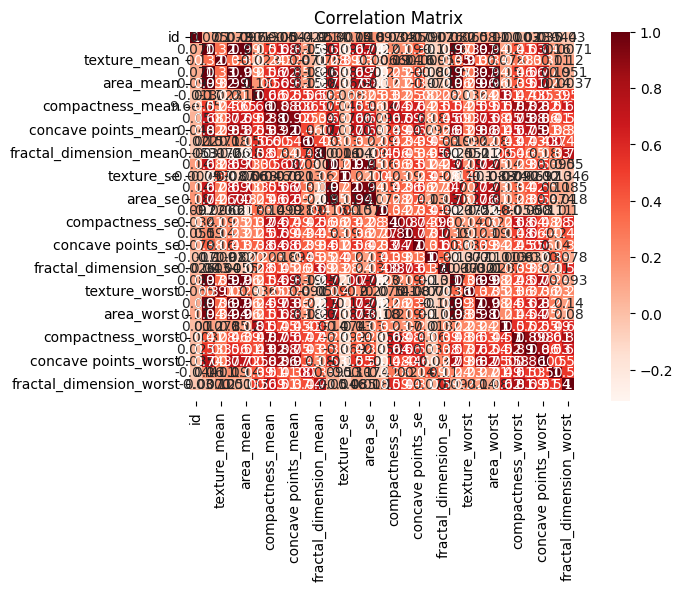

In [7]:
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [8]:
highly_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False)
highly_correlated = highly_correlated[highly_correlated < 1]  # Exclude self-correlation
highly_correlated = highly_correlated[highly_correlated >= 0.7]  # Consider correlation coefficient threshold (adjust as needed)

print(highly_correlated)

perimeter_mean       radius_mean            0.997855
radius_mean          perimeter_mean         0.997855
radius_worst         perimeter_worst        0.993708
perimeter_worst      radius_worst           0.993708
radius_mean          area_mean              0.987357
                                              ...   
concavity_mean       perimeter_mean         0.716136
radius_se            radius_worst           0.715065
radius_worst         radius_se              0.715065
perimeter_se         concave points_mean    0.710650
concave points_mean  perimeter_se           0.710650
Length: 140, dtype: float64


# **Exploratory Analysis and Visualization**

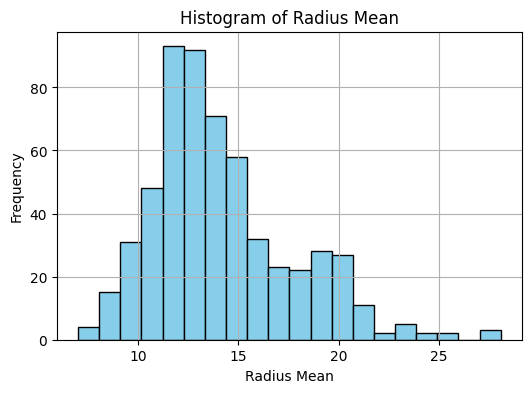

In [9]:
# Histogram for radius_mean
plt.figure(figsize=(6, 4))
plt.hist(data['radius_mean'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')
plt.grid(True)
plt.show()

 The dataset contains a range of tumor samples with different mean radius values. The histogram shows that tumors with a mean radius of around 12 and 13 are frequently observed, so clinicians may encounter such cases more often during diagnosis and treatment.

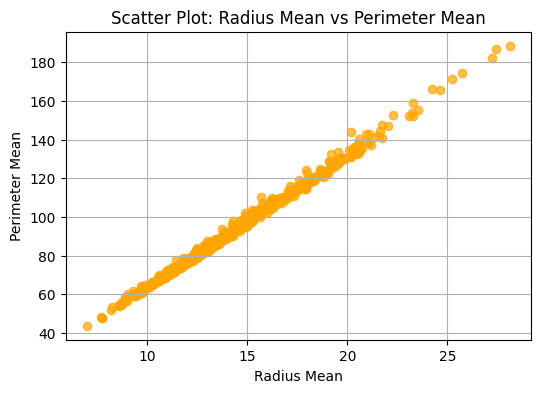

In [10]:
# Scatter plot for radius_mean vs perimeter_mean
plt.figure(figsize=(6, 4))
plt.scatter(data['radius_mean'], data['perimeter_mean'], color='orange', alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot: Radius Mean vs Perimeter Mean')
plt.grid(True)
plt.show()

From the above scatter plot, the radius means and perimeter mean are directly proportional, i.e., the perimeter mean increases with an increase in radius mean. These means that larger tumors may naturally have larger perimeters due to their increased size and growth.

# **Training and Test Sets**

In [11]:
!pip install scikit-learn --upgrade --quiet


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
print('train_data.shape :', train_data.shape)
print('test_data.shape :', test_data.shape)

train_data.shape : (455, 33)
test_data.shape : (114, 33)


# **Identifying Input and Target Columns**

In [15]:
input_cols = list(train_data.columns)[2:-1]
target_col = 'diagnosis'

In [16]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [17]:
target_col

'diagnosis'

**creating inputs and targets for the training and test sets for further processing and model training.**

In [18]:
train_inputs = train_data[input_cols].copy()
train_targets = train_data[target_col].copy()

In [19]:
test_inputs = test_data[input_cols].copy()
test_targets = test_data[target_col].copy()

In [20]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [21]:
train_targets

68     B
181    M
63     B
248    B
60     B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 455, dtype: object

**Identifying which of the columns are numerical and which ones are categorical**

In [22]:
import numpy as np

In [23]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's also check the number of categories in each of the categorical columns.

In [24]:
train_inputs[categorical_cols].nunique()

Series([], dtype: float64)

# **Imputing Missing Numeric Data**

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy = 'mean')

In [27]:
data[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [28]:
imputer.fit(data[numeric_cols])

SimpleImputer()

The missing values in the training and  test sets can now be filled in using the `transform` method of `imputer`.

In [29]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [30]:
train_inputs[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Scaling Numeric Features**

The numeric columns in our dataset have varying ranges.

In [31]:
data[numeric_cols].describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0,1) range.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

We can now separately scale the training, validation and test sets using the transform method of scaler.



In [34]:
# Fit the scaler on the training data
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [35]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range (0,1)

In [36]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.314738,0.320427,0.312720,0.207662,0.389221,0.288471,0.208290,0.239960,0.343826,0.269519,...,0.276190,0.360226,0.267465,0.162115,0.409985,0.247583,0.219325,0.392379,0.264148,0.244387
std,0.173163,0.144268,0.173012,0.152297,0.125693,0.179681,0.186195,0.189166,0.146756,0.151847,...,0.175838,0.161650,0.169664,0.140848,0.156779,0.170231,0.167251,0.224488,0.124485,0.151305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196582,0.218465,0.193342,0.107226,0.299675,0.148997,0.068697,0.101093,0.241057,0.161858,...,0.159966,0.240538,0.151314,0.072660,0.293622,0.129210,0.093091,0.219691,0.183323,0.135724
50%,0.274695,0.303348,0.270736,0.163606,0.379074,0.245154,0.144189,0.166054,0.333689,0.242628,...,0.229954,0.351812,0.219511,0.114877,0.405692,0.200756,0.180831,0.338866,0.248768,0.212106
75%,0.394192,0.401589,0.397140,0.256243,0.468719,0.383261,0.310098,0.367271,0.422317,0.339933,...,0.355676,0.470949,0.356667,0.200452,0.508592,0.345164,0.309265,0.553608,0.317859,0.313920
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
data[categorical_cols].nunique()

Series([], dtype: float64)

# **Training a Logistic Regression Model**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression(solver='liblinear')

We can train the model using model.fit.

In [40]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [41]:
print(model.coef_.tolist())

[[0.8432360461579879, 0.9557913564106387, 0.8776142351714215, 1.0401445902020487, -0.31399342785096385, 0.4252063181083206, 1.6956283090076993, 2.357704970339142, -0.07013663719140109, -1.3269933935313767, 1.1896591424564817, -0.3403339838493213, 0.8845403584863276, 0.8326806652204422, -0.30502546730581526, -0.7667329880894096, -0.40776080356525374, -0.18763990532777103, -0.6141202980653896, -0.7146989964698003, 1.6752466225689104, 1.546047257072047, 1.490532360723956, 1.424388139440175, 0.6975950318595798, 0.8413963820174644, 1.261368920022276, 2.16021917673928, 0.9966840783060806, 0.18479673316663173]]


In [42]:
print(model.intercept_)

[-5.45372767]


# **Making Predictions and Evaluating the Model**

In [43]:
X_train = train_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [44]:
train_preds = model.predict(X_train)

In [45]:
train_preds

array(['B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B

In [46]:
train_targets

68     B
181    M
63     B
248    B
60     B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 455, dtype: object

We can output a probabilistic prediction using predict_proba.

In [47]:
train_probs = model.predict_proba(X_train)
train_probs

array([[7.46328276e-01, 2.53671724e-01],
       [1.00794305e-03, 9.98992057e-01],
       [9.87554170e-01, 1.24458296e-02],
       [9.02242605e-01, 9.77573949e-02],
       [9.88122606e-01, 1.18773938e-02],
       [7.86054365e-02, 9.21394564e-01],
       [8.72837410e-01, 1.27162590e-01],
       [9.35317410e-01, 6.46825896e-02],
       [8.99448365e-01, 1.00551635e-01],
       [4.88233842e-02, 9.51176616e-01],
       [7.75638082e-01, 2.24361918e-01],
       [8.68977885e-03, 9.91310221e-01],
       [1.04970634e-01, 8.95029366e-01],
       [9.60475649e-01, 3.95243512e-02],
       [9.03066656e-01, 9.69333442e-02],
       [1.44406622e-02, 9.85559338e-01],
       [4.16831258e-03, 9.95831687e-01],
       [1.30753248e-02, 9.86924675e-01],
       [8.28931313e-01, 1.71068687e-01],
       [9.48424503e-01, 5.15754968e-02],
       [7.43038045e-01, 2.56961955e-01],
       [1.14673328e-01, 8.85326672e-01],
       [6.09890479e-01, 3.90109521e-01],
       [9.49400732e-01, 5.05992685e-02],
       [6.173325

The numbers above indicate the probabilities for the target classes "B" and "M"

In [48]:
model.classes_

array(['B', 'M'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

This can be done using the accuracy_score function from sklearn.metrics.

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(train_targets, train_preds)

0.967032967032967

The model achieves an accuracy of 96.7% on the training set.

We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.99300699, 0.00699301],
       [0.07692308, 0.92307692]])

In [53]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 96.70%


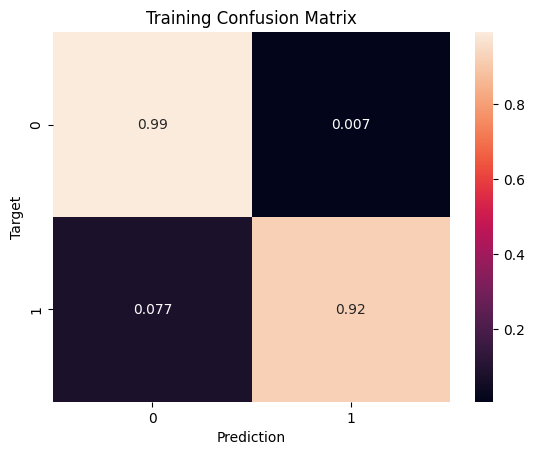

In [54]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Let's compute the model's accuracy on the test sets too.

Accuracy: 97.37%


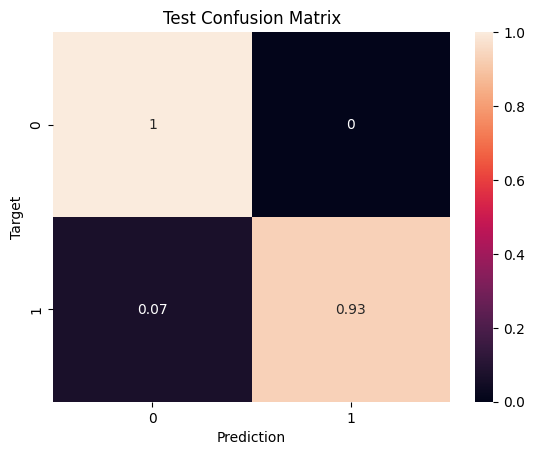

In [55]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test set are above 97%, which suggests that our model generalizes well to data it hasn't seen before.

Let's create two models: one that guesses randomly and another that always return "M". Both of these models completely ignore the inputs given to them.

In [56]:
def random_guess(inputs):
    return np.random.choice(["B", "M"], len(inputs))

In [57]:
def all_M(inputs):
    return np.full(len(inputs), "M")

Let's check the accuracies of these two models on the test set.

In [58]:
accuracy_score(test_targets, random_guess(X_test))

0.5087719298245614

In [59]:
accuracy_score(test_targets, all_M(X_test))

0.37719298245614036

Our random model achieves an accuracy of 46% and our "always M" model achieves an accuracy of 38%.


Fortunately, our model outperforms a dumb or random model! While this may not always be the scenario, it's essential to compare any trained model with such baseline models as a standard practice.